In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
!pip install dmba
from dmba import plotDecisionTree, classificationSummary, regressionSummary

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 2.5 MB/s 
no display found. Using non-interactive Agg backend


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
fraud = pd.read_csv('fraud_oracle.csv')
print(fraud.shape)
fraud.head()


(15420, 33)


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [ ]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [ ]:
fraud.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [ ]:
print('Month',fraud['Month'].unique())

Month ['Dec' 'Jan' 'Oct' 'Jun' 'Feb' 'Nov' 'Apr' 'Mar' 'Aug' 'Jul' 'May' 'Sep']


In [ ]:
print('AgeOfVehicle',fraud['AgeOfVehicle'].unique())

AgeOfVehicle ['3 years' '6 years' '7 years' 'more than 7' '5 years' 'new' '4 years'
 '2 years']


In [ ]:
print('Fault',fraud['Fault'].unique())

Fault ['Policy Holder' 'Third Party']


In [ ]:
from sklearn.base import TransformerMixin

In [ ]:
print('DayOfWeekClaimed',fraud['DayOfWeekClaimed'].unique()) 

DayOfWeekClaimed ['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday'
 '0']


In [ ]:
print('MonthClaimed',fraud['MonthClaimed'].unique()) 

MonthClaimed ['Jan' 'Nov' 'Jul' 'Feb' 'Mar' 'Dec' 'Apr' 'Aug' 'May' 'Jun' 'Sep' 'Oct'
 '0']


In [ ]:
print('Age',fraud['Age'].unique()) 

Age [21 34 47 65 27 20 36  0 30 42 71 52 28 61 38 41 32 40 63 31 45 60 39 55
 35 44 72 29 37 59 49 50 26 48 64 33 74 23 25 56 16 68 18 51 22 53 46 43
 57 54 69 67 19 78 77 75 80 58 73 24 76 62 79 70 17 66]


In [ ]:
week_0 = fraud["DayOfWeekClaimed"] == "0"
day_of_week_0 = fraud[week_0]
day_of_week_0

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
1516,Jul,2,Monday,Honda,Rural,0,0,1,Male,Single,0,Policy Holder,Sedan - All Perils,Sedan,more than 69000,0,1517,15,400,2,more than 30,none,none,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils


In [ ]:
month_0 = fraud["MonthClaimed"] == "0"
monthclaimed_0 = fraud[month_0]
monthclaimed_0

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
1516,Jul,2,Monday,Honda,Rural,0,0,1,Male,Single,0,Policy Holder,Sedan - All Perils,Sedan,more than 69000,0,1517,15,400,2,more than 30,none,none,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils


In [ ]:
age_0 = fraud["Age"] == 0
agefound_0 = fraud[age_0]
print(len(agefound_0))
agefound_0

320


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
7,Nov,1,Friday,Honda,Urban,Tuesday,Mar,4,Male,Single,0,Policy Holder,Sport - Collision,Sport,more than 69000,0,8,1,400,4,more than 30,more than 30,1,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
13,Jan,5,Friday,Honda,Rural,Wednesday,Feb,1,Male,Single,0,Third Party,Sedan - Collision,Sedan,more than 69000,0,14,12,400,3,more than 30,more than 30,none,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
28,Jul,1,Saturday,Honda,Urban,Tuesday,Sep,4,Male,Single,0,Policy Holder,Sedan - All Perils,Sedan,more than 69000,1,29,9,400,1,more than 30,more than 30,none,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils
31,Mar,1,Sunday,Honda,Urban,Tuesday,Mar,2,Male,Single,0,Policy Holder,Sedan - Collision,Sedan,more than 69000,0,32,6,400,1,more than 30,more than 30,1,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
58,May,1,Monday,Honda,Rural,Wednesday,May,4,Male,Single,0,Policy Holder,Sedan - Liability,Sport,more than 69000,0,59,15,400,4,more than 30,more than 30,none,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Liability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15243,May,2,Tuesday,Honda,Urban,Monday,May,3,Male,Single,0,Policy Holder,Sedan - Liability,Sport,more than 69000,0,15244,7,400,3,more than 30,more than 30,none,new,16 to 17,No,No,External,none,no change,1 vehicle,1996,Liability
15262,Mar,3,Monday,Honda,Urban,Thursday,Mar,3,Male,Single,0,Policy Holder,Sedan - Liability,Sport,more than 69000,0,15263,5,400,3,more than 30,more than 30,more than 4,new,16 to 17,No,No,External,none,no change,1 vehicle,1996,Liability
15274,Apr,3,Monday,Honda,Urban,Tuesday,May,1,Male,Single,0,Third Party,Sedan - Collision,Sedan,more than 69000,0,15275,1,400,2,more than 30,more than 30,more than 4,new,16 to 17,No,No,External,none,no change,1 vehicle,1996,Collision
15379,Jan,2,Tuesday,Honda,Urban,Thursday,Jan,2,Male,Single,0,Policy Holder,Utility - All Perils,Utility,more than 69000,0,15380,1,400,3,more than 30,more than 30,more than 4,new,16 to 17,No,No,External,none,1 year,1 vehicle,1996,All Perils


In [ ]:
agefound_0['AgeOfPolicyHolder'].unique()

array(['16 to 17'], dtype=object)

#Cleaning the dataset

In [ ]:
fraud.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [ ]:
fraud["DayOfWeekClaimed"] = fraud["DayOfWeekClaimed"].replace(["0"],["Monday"])

In [ ]:
print('DayOfWeekClaimed',fraud['DayOfWeekClaimed'].unique())

DayOfWeekClaimed ['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday']


In [ ]:
fraud["MonthClaimed"] = fraud["MonthClaimed"].replace(["0"],["Aug"])

In [ ]:
print('MonthClaimed',fraud['MonthClaimed'].unique())

MonthClaimed ['Jan' 'Nov' 'Jul' 'Feb' 'Mar' 'Dec' 'Apr' 'Aug' 'May' 'Jun' 'Sep' 'Oct']


In [ ]:
fraud["Age"] = fraud["Age"].replace([0],[16.5])

In [ ]:
print('Age',fraud['Age'].unique())

Age [21.  34.  47.  65.  27.  20.  36.  16.5 30.  42.  71.  52.  28.  61.
 38.  41.  32.  40.  63.  31.  45.  60.  39.  55.  35.  44.  72.  29.
 37.  59.  49.  50.  26.  48.  64.  33.  74.  23.  25.  56.  16.  68.
 18.  51.  22.  53.  46.  43.  57.  54.  69.  67.  19.  78.  77.  75.
 80.  58.  73.  24.  76.  62.  79.  70.  17.  66. ]


In [ ]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Month                 15420 non-null  object 
 1   WeekOfMonth           15420 non-null  int64  
 2   DayOfWeek             15420 non-null  object 
 3   Make                  15420 non-null  object 
 4   AccidentArea          15420 non-null  object 
 5   DayOfWeekClaimed      15420 non-null  object 
 6   MonthClaimed          15420 non-null  object 
 7   WeekOfMonthClaimed    15420 non-null  int64  
 8   Sex                   15420 non-null  object 
 9   MaritalStatus         15420 non-null  object 
 10  Age                   15420 non-null  float64
 11  Fault                 15420 non-null  object 
 12  PolicyType            15420 non-null  object 
 13  VehicleCategory       15420 non-null  object 
 14  VehiclePrice          15420 non-null  object 
 15  FraudFound_P       

In [ ]:
print('Make',fraud['Make'].unique())

Make ['Honda' 'Toyota' 'Ford' 'Mazda' 'Chevrolet' 'Pontiac' 'Accura' 'Dodge'
 'Mercury' 'Jaguar' 'Nisson' 'VW' 'Saab' 'Saturn' 'Porche' 'BMW' 'Mecedes'
 'Ferrari' 'Lexus']


In [ ]:
print('AgeOfPolicyHolder',fraud['AgeOfPolicyHolder'].unique())

AgeOfPolicyHolder ['26 to 30' '31 to 35' '41 to 50' '51 to 65' '21 to 25' '36 to 40'
 '16 to 17' 'over 65' '18 to 20']


In [ ]:
groupings = []
for holder in fraud['AgeOfPolicyHolder']:
    if 'to' in holder :
        temp = holder.split()
        nr=[int(temp[0]),int(temp[2])]
        groupings.append(nr)
    else :
        temp = holder.split()
        nr = [int(temp[1]),129]
        groupings.append(nr)

In [ ]:
age_idx = []
rw_idx = []
for r in range(len(fraud['Age'])):
    if (fraud.loc[r,'Age']>= groupings[r][0]) & (fraud.loc[r,'Age']<= groupings[r][1]):
        age_idx.append(0)
    else:
        age_idx.append(1)
        rw_idx.append(r)

In [ ]:
print(len(fraud.loc[list(rw_idx),('Age','AgeOfPolicyHolder')]))
fraud.loc[list(rw_idx),('Age','AgeOfPolicyHolder')].head()

6922


,Age,AgeOfPolicyHolder
0,21.0,26 to 30
4,27.0,31 to 35
5,20.0,21 to 25
8,30.0,31 to 35
9,42.0,36 to 40


In [ ]:
print('AccidentArea',fraud['AccidentArea'].unique())

AccidentArea ['Urban' 'Rural']


In [ ]:
print('Fault',fraud['Fault'].unique())

Fault ['Policy Holder' 'Third Party']


In [ ]:
print('VehicleCategory',fraud['VehicleCategory'].unique())

VehicleCategory ['Sport' 'Utility' 'Sedan']


In [ ]:
print('VehiclePrice',fraud['VehiclePrice'].unique())

VehiclePrice ['more than 69000' '20000 to 29000' '30000 to 39000' 'less than 20000'
 '40000 to 59000' '60000 to 69000']


In [ ]:
print('Days_Policy_Accident',fraud['Days_Policy_Accident'].unique())

Days_Policy_Accident ['more than 30' '15 to 30' 'none' '1 to 7' '8 to 15']


In [ ]:
print('Days_Policy_Claim',fraud['Days_Policy_Claim'].unique())

Days_Policy_Claim ['more than 30' '15 to 30' '8 to 15' 'none']


In [ ]:
print('PastNumberOfClaims',fraud['PastNumberOfClaims'].unique())

PastNumberOfClaims ['none' '1' '2 to 4' 'more than 4']


In [ ]:
print('AgeOfVehicle',fraud['AgeOfVehicle'].unique())

AgeOfVehicle ['3 years' '6 years' '7 years' 'more than 7' '5 years' 'new' '4 years'
 '2 years']


In [ ]:
print('NumberOfSuppliments',fraud['NumberOfSuppliments'].unique())

NumberOfSuppliments ['none' 'more than 5' '3 to 5' '1 to 2']


In [ ]:
print('AddressChange_Claim',fraud['AddressChange_Claim'].unique())

AddressChange_Claim ['1 year' 'no change' '4 to 8 years' '2 to 3 years' 'under 6 months']


In [ ]:
print('NumberOfCars',fraud['NumberOfCars'].unique())

NumberOfCars ['3 to 4' '1 vehicle' '2 vehicles' '5 to 8' 'more than 8']


In [ ]:
print('Year',fraud['Year'].unique())

Year [1994 1995 1996]


In [ ]:
print('BasePolicy',fraud['BasePolicy'].unique())

BasePolicy ['Liability' 'Collision' 'All Perils']


In [ ]:
print('RepNumber',fraud['RepNumber'].unique())

RepNumber [12 15  7  4  3 14  1 13 11 16  6  2  8  5  9 10]


In [ ]:
print('WeekOfMonth',fraud['WeekOfMonth'].unique())

WeekOfMonth [5 3 2 4 1]


In [ ]:
print('WeekOfMonthClaimed',fraud['WeekOfMonthClaimed'].unique())

WeekOfMonthClaimed [1 4 2 3 5]


#Data distributions

In [ ]:
fraud_corr = fraud.corr().round(2)
fraud_corr

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
WeekOfMonth,1.00,0.28,-0.01,-0.01,-0.01,0.01,-0.00,-0.02,-0.00
WeekOfMonthClaimed,0.28,1.00,0.00,-0.01,0.01,0.01,0.01,-0.00,0.01
Age,-0.01,0.00,1.00,-0.03,0.02,-0.01,0.07,0.00,0.02
FraudFound_P,-0.01,-0.01,-0.03,1.00,-0.02,-0.01,0.02,0.01,-0.02
PolicyNumber,-0.01,0.01,0.02,-0.02,1.00,0.01,0.00,-0.01,0.94
RepNumber,0.01,0.01,-0.01,-0.01,0.01,1.00,0.00,0.01,0.01
Deductible,-0.00,0.01,0.07,0.02,0.00,0.00,1.00,0.00,-0.00
DriverRating,-0.02,-0.00,0.00,0.01,-0.01,0.01,0.00,1.00,-0.01
Year,-0.00,0.01,0.02,-0.02,0.94,0.01,-0.00,-0.01,1.00


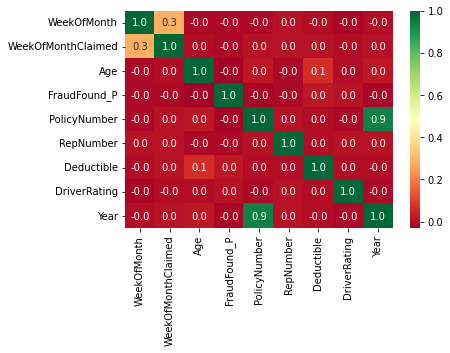

In [ ]:
sns.heatmap(fraud_corr, annot= True, fmt ='.1f', cmap ='RdYlGn')

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [ ]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Month                 15420 non-null  object 
 1   WeekOfMonth           15420 non-null  int64  
 2   DayOfWeek             15420 non-null  object 
 3   Make                  15420 non-null  object 
 4   AccidentArea          15420 non-null  object 
 5   DayOfWeekClaimed      15420 non-null  object 
 6   MonthClaimed          15420 non-null  object 
 7   WeekOfMonthClaimed    15420 non-null  int64  
 8   Sex                   15420 non-null  object 
 9   MaritalStatus         15420 non-null  object 
 10  Age                   15420 non-null  float64
 11  Fault                 15420 non-null  object 
 12  PolicyType            15420 non-null  object 
 13  VehicleCategory       15420 non-null  object 
 14  VehiclePrice          15420 non-null  object 
 15  FraudFound_P       

[Text(0, 0.5, 'Total counts')]

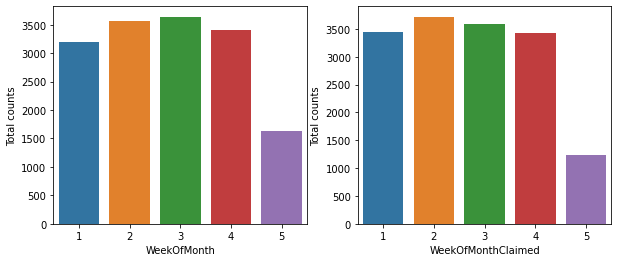

In [ ]:
WeekofMonth = fraud.groupby('WeekOfMonth').agg("count").reset_index()
WeekofMonthClaimed= fraud.groupby('WeekOfMonthClaimed').agg("count").reset_index()


fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10, 4))
grph1=sns.barplot(x='WeekOfMonth',  y ="PolicyNumber", data = WeekofMonth , ax=ax1)
sns.barplot(x='WeekOfMonthClaimed', y ="PolicyNumber", data = WeekofMonthClaimed, ax=ax2)

ax2.set(ylabel='Total counts')
ax1.set(ylabel='Total counts')


[Text(0, 0, '300'), Text(0, 0, '400'), Text(0, 0, '500'), Text(0, 0, '700')]

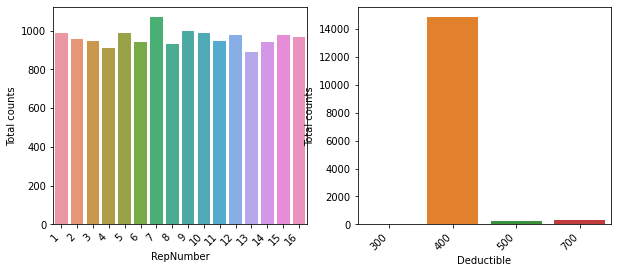

In [ ]:
RepNumber = fraud.groupby('RepNumber').agg("count").reset_index()
Deductible= fraud.groupby('Deductible').agg("count").reset_index()

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
grph1=sns.barplot(x='RepNumber',  y ="PolicyNumber", data = RepNumber , ax=ax1)
grph2= sns.barplot(x='Deductible', y ="PolicyNumber", data = Deductible, ax=ax2)

ax2.set(ylabel='Total counts')
ax1.set(ylabel='Total counts')

grph1.set_xticklabels(grph1.get_xticklabels(),
                    rotation=45,
                    horizontalalignment='right'
                    )
grph2.set_xticklabels(grph2.get_xticklabels(),
                    rotation=45,
                    horizontalalignment='right'
                    )

[Text(0, 0, '1 to 7'),
 Text(0, 0, '15 to 30'),
 Text(0, 0, '8 to 15'),
 Text(0, 0, 'more than 30'),
 Text(0, 0, 'none')]

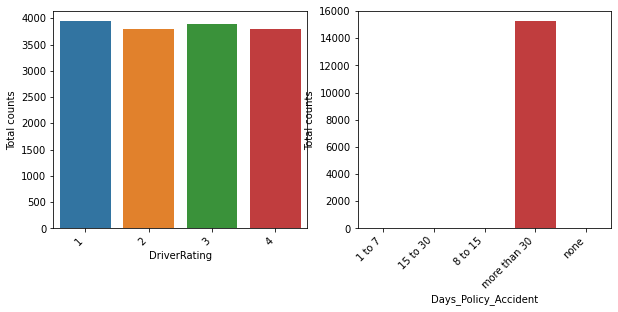

In [ ]:
DriverRating = fraud.groupby('DriverRating').agg("count").reset_index()
Days_Policy_Accident= fraud.groupby('Days_Policy_Accident').agg("count").reset_index()

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
grph1=sns.barplot(x='DriverRating',  y ="FraudFound_P", data = DriverRating , ax=ax1)
grph2= sns.barplot(x='Days_Policy_Accident', y ="FraudFound_P", data = Days_Policy_Accident, ax=ax2)

ax2.set(ylabel='Total counts')
ax1.set(ylabel='Total counts')

grph1.set_xticklabels(grph1.get_xticklabels(),
                    rotation=45,
                    horizontalalignment='right'
                    )
grph2.set_xticklabels(grph2.get_xticklabels(),
                    rotation=45,
                    horizontalalignment='right'
                    )

#Will be taking mode of range for Days_Policy_Accident

In [ ]:
dayspolicy_accident = {"1 to 7" : 7 , "15 to 30" : 30 ,"8 to 15" : 15 ,"more than 30" : 45 ,"none" : 0 }
fraud["Days_Policy_Accident"] = fraud['Days_Policy_Accident'].apply(lambda x: dayspolicy_accident[x])


In [ ]:
print('Days_Policy_Accident',fraud['Days_Policy_Accident'].unique())

Days_Policy_Accident [45 30  0  7 15]


[Text(0, 0, '1'),
 Text(0, 0, '2 to 4'),
 Text(0, 0, 'more than 4'),
 Text(0, 0, 'none')]

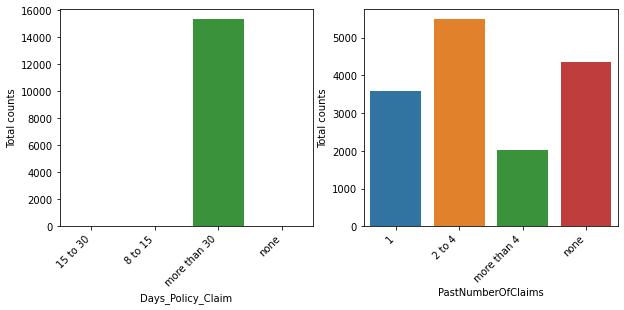

In [ ]:
Days_Policy_Claim = fraud.groupby('Days_Policy_Claim').agg("count").reset_index()
PastNumberOfClaims= fraud.groupby('PastNumberOfClaims').agg("count").reset_index()

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
grph1=sns.barplot(x='Days_Policy_Claim',  y ="FraudFound_P", data = Days_Policy_Claim , ax=ax1)
grph2= sns.barplot(x='PastNumberOfClaims', y ="FraudFound_P", data = PastNumberOfClaims, ax=ax2)

ax2.set(ylabel='Total counts')
ax1.set(ylabel='Total counts')

grph1.set_xticklabels(grph1.get_xticklabels(),
                    rotation=45,
                    horizontalalignment='right'
                    )
grph2.set_xticklabels(grph2.get_xticklabels(),
                    rotation=45,
                    horizontalalignment='right'
                    )

#Taking Mode Value for the Ranges Of columns Days_Policy_Claim and PastNumberOfClaims

In [ ]:
dayspolicy_claim = {"15 to 30" : 30, "8 to 15" : 15 ,"more than 30" : 45 ,"none" : 0 }
fraud["Days_Policy_Claim"] = fraud['Days_Policy_Claim'].apply(lambda x: dayspolicy_claim[x])

In [ ]:
print("Days_Policy_Claim", fraud["Days_Policy_Claim"].unique())

Days_Policy_Claim [45 30 15  0]


In [ ]:
pastnumber_claim = {"1" : 1, "2 to 4" : 4 ,"more than 4" : 5 ,"none" : 0 }
fraud["PastNumberOfClaims"] = fraud['PastNumberOfClaims'].apply(lambda x: pastnumber_claim[x])

In [ ]:
print("PastNumberOfClaims", fraud["PastNumberOfClaims"].unique())

PastNumberOfClaims [0 1 4 5]


[Text(0, 0, '16 to 17'),
 Text(0, 0, '18 to 20'),
 Text(0, 0, '21 to 25'),
 Text(0, 0, '26 to 30'),
 Text(0, 0, '31 to 35'),
 Text(0, 0, '36 to 40'),
 Text(0, 0, '41 to 50'),
 Text(0, 0, '51 to 65'),
 Text(0, 0, 'over 65')]

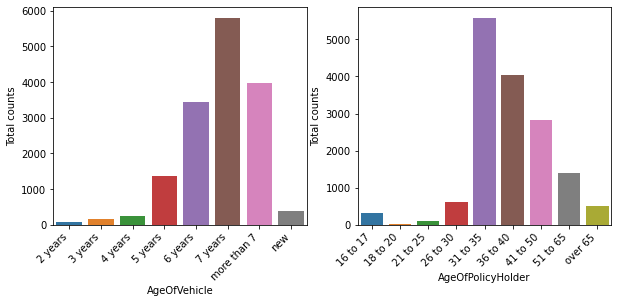

In [ ]:
AgeOfVehicle = fraud.groupby('AgeOfVehicle').agg("count").reset_index()
AgeOfPolicyHolder= fraud.groupby('AgeOfPolicyHolder').agg("count").reset_index()
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
grph1=sns.barplot(x='AgeOfVehicle',  y ="FraudFound_P", data = AgeOfVehicle , ax=ax1)
grph2= sns.barplot(x='AgeOfPolicyHolder', y ="FraudFound_P", data = AgeOfPolicyHolder, ax=ax2)
ax2.set(ylabel='Total counts')
ax1.set(ylabel='Total counts')
grph1.set_xticklabels(grph1.get_xticklabels(),
                    rotation=45,
                    horizontalalignment='right')
grph2.set_xticklabels(grph2.get_xticklabels(),
                    rotation=45,
                    horizontalalignment='right')

#Taking mode values for range for columns AgeOfVehicle

In [ ]:
agevehicle = {"2 years" : 2, "3 years" : 3 ,"4 years" : 4 ,"5 years" : 5, "6 years" : 6, "7 years" : 7, "more than 7" : 8, "new" : 1 }
fraud["AgeOfVehicle"] = fraud['AgeOfVehicle'].apply(lambda x: agevehicle[x])

In [ ]:
print("AgeOfVehicle", fraud["AgeOfVehicle"].unique())

AgeOfVehicle [3 6 7 8 5 1 4 2]


[Text(0, 0, '20000 to 29000'),
 Text(0, 0, '30000 to 39000'),
 Text(0, 0, '40000 to 59000'),
 Text(0, 0, '60000 to 69000'),
 Text(0, 0, 'less than 20000'),
 Text(0, 0, 'more than 69000')]

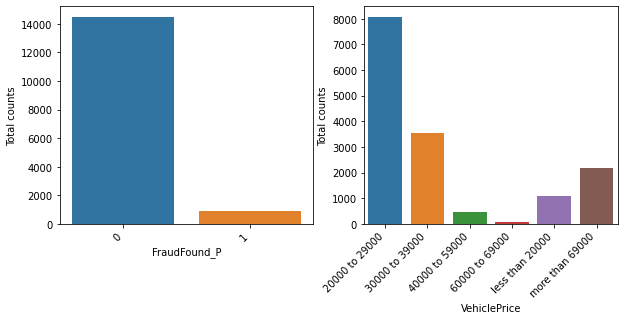

In [ ]:
FraudFound_P = fraud.groupby('FraudFound_P').agg("count").reset_index()
VehiclePrice= fraud.groupby('VehiclePrice').agg("count").reset_index()
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
grph1=sns.barplot(x='FraudFound_P',  y ="PolicyNumber", data = FraudFound_P , ax=ax1)
grph2= sns.barplot(x='VehiclePrice', y ="PolicyNumber", data = VehiclePrice, ax=ax2)
ax2.set(ylabel='Total counts')
ax1.set(ylabel='Total counts')
grph1.set_xticklabels(grph1.get_xticklabels(),
                    rotation=45,
                    horizontalalignment='right')
grph2.set_xticklabels(grph2.get_xticklabels(),
                    rotation=45,
                    horizontalalignment='right')

In [ ]:
fraud.FraudFound_P.value_counts()

0    14497
1      923
Name: FraudFound_P, dtype: int64

#Taking the mean values for the ranges of column VehiclePrice

In [ ]:
print("VehiclePrice", fraud["VehiclePrice"].unique())

VehiclePrice ['more than 69000' '20000 to 29000' '30000 to 39000' 'less than 20000'
 '40000 to 59000' '60000 to 69000']


In [ ]:
pricevehicle = {"more than 69000" : 79000, "20000 to 29000" : 24500 ,"30000 to 39000" : 34500,
                "less than 20000" : 14500, "40000 to 59000" :  49500, "60000 to 69000" : 64500}
fraud["VehiclePrice"] = fraud['VehiclePrice'].apply(lambda x: pricevehicle[x])

In [ ]:
print("VehiclePrice", fraud["VehiclePrice"].unique())

VehiclePrice [79000 24500 34500 14500 49500 64500]


In [ ]:
fig = make_subplots(rows=1, cols=2,specs=[[{'type':'domain'},{'type':'domain'}]],subplot_titles=['Month', 'MonthClaimed'])


fig.add_trace(go.Pie(labels= fraud["Month"].value_counts().index, values=[x for x in fraud["Month"].value_counts()], name="Month"),
              1, 1)
fig.add_trace(go.Pie(labels= fraud["MonthClaimed"].value_counts().index, values=[x for x in fraud["MonthClaimed"].value_counts()], name="Month"),
              1, 2)

fig.show()

In [ ]:
fig = make_subplots(rows=1, cols=2,specs=[[{'type':'domain'},{'type':'domain'}]],subplot_titles=['DayOfWeek', 'DayOfWeekClaimed'])


fig.add_trace(go.Pie(labels= fraud["DayOfWeek"].value_counts().index, values=[x for x in fraud["DayOfWeek"].value_counts()], name="DayofWeek"),1,1)
fig.add_trace(go.Pie(labels= fraud["DayOfWeekClaimed"].value_counts().index, values=[x for x in fraud["DayOfWeekClaimed"].value_counts()], name="DayOfWeekClaimed"),1,2)

fig.show()

#Combining DayOfWeekClaimed Saturday and Sunday with Monday

In [ ]:
group__weekclaimed = {"Tuesday" : "Tuesday", "Monday" : "Monday","Thursday" : "Thursday","Friday" : "Friday","Wednesday" :"Wednesday" ,"Saturday" : "Monday", "Sunday" : "Monday"}

In [ ]:
fraud['DayOfWeekClaimed'] = fraud['DayOfWeekClaimed'].apply(lambda x: group__weekclaimed[x])

In [ ]:
print('DayOfWeekClaimed',fraud['DayOfWeekClaimed'].unique())

DayOfWeekClaimed ['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday']


[Text(0, 0, 'Rural'), Text(0, 0, 'Urban')]

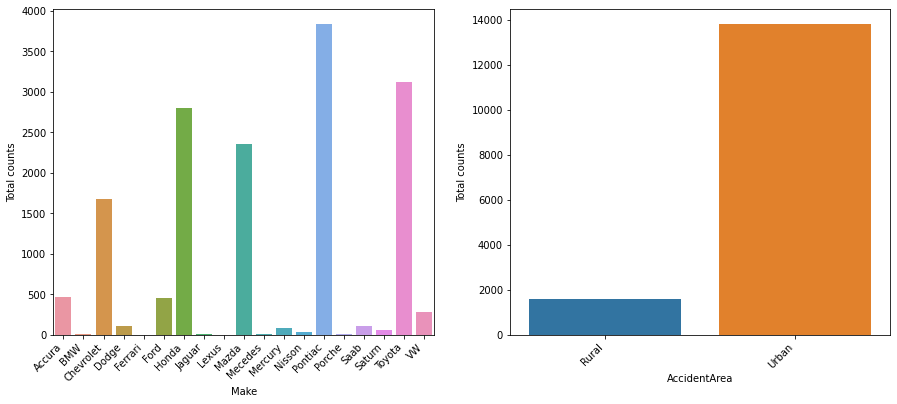

In [ ]:
Make = fraud.groupby('Make').agg("count").reset_index()
AccidentArea= fraud.groupby('AccidentArea').agg("count").reset_index()
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
grph1=sns.barplot(x='Make',  y ="PolicyNumber", data = Make , ax=ax1)
grph2= sns.barplot(x='AccidentArea', y ="PolicyNumber", data = AccidentArea, ax=ax2)
ax2.set(ylabel='Total counts')
ax1.set(ylabel='Total counts')
grph1.set_xticklabels(grph1.get_xticklabels(),
                    rotation=45,
                    horizontalalignment='right')
grph2.set_xticklabels(grph2.get_xticklabels(),
                    rotation=45,
                    horizontalalignment='right')

[Text(0, 0, 'Sedan - All Perils'),
 Text(0, 0, 'Sedan - Collision'),
 Text(0, 0, 'Sedan - Liability'),
 Text(0, 0, 'Sport - All Perils'),
 Text(0, 0, 'Sport - Collision'),
 Text(0, 0, 'Sport - Liability'),
 Text(0, 0, 'Utility - All Perils'),
 Text(0, 0, 'Utility - Collision'),
 Text(0, 0, 'Utility - Liability')]

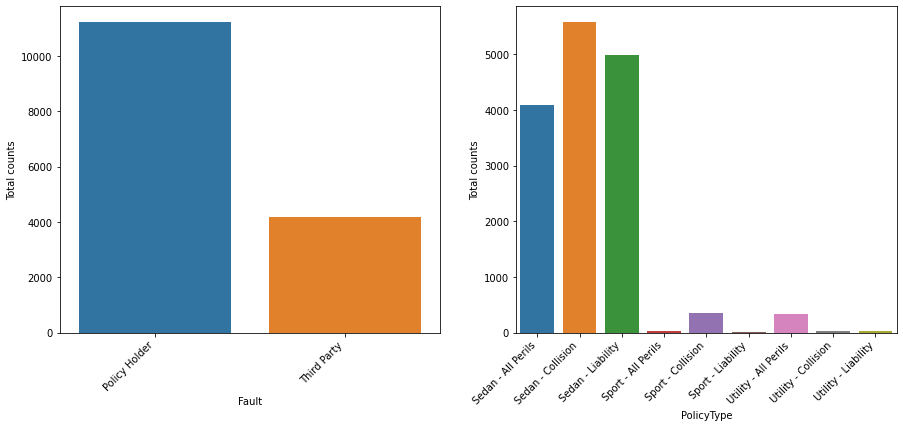

In [ ]:
Fault = fraud.groupby('Fault').agg("count").reset_index()
PolicyType= fraud.groupby('PolicyType').agg("count").reset_index()
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
grph1=sns.barplot(x='Fault',  y ="PolicyNumber", data = Fault , ax=ax1)
grph2= sns.barplot(x='PolicyType', y ="PolicyNumber", data = PolicyType, ax=ax2)
ax2.set(ylabel='Total counts')
ax1.set(ylabel='Total counts')
grph1.set_xticklabels(grph1.get_xticklabels(),
                    rotation=45,
                    horizontalalignment='right')
grph2.set_xticklabels(grph2.get_xticklabels(),
                    rotation=45,
                    horizontalalignment='right')

[Text(0, 0, 'Divorced'),
 Text(0, 0, 'Married'),
 Text(0, 0, 'Single'),
 Text(0, 0, 'Widow')]

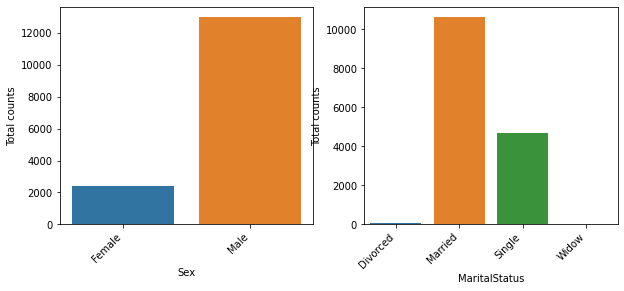

In [ ]:
Sex = fraud.groupby('Sex').agg("count").reset_index()
MaritalStatus= fraud.groupby('MaritalStatus').agg("count").reset_index()
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
grph1=sns.barplot(x='Sex',  y ="PolicyNumber", data = Sex , ax=ax1)
grph2= sns.barplot(x='MaritalStatus', y ="PolicyNumber", data = MaritalStatus, ax=ax2)
ax2.set(ylabel='Total counts')
ax1.set(ylabel='Total counts')
grph1.set_xticklabels(grph1.get_xticklabels(),
                    rotation=45,
                    horizontalalignment='right')
grph2.set_xticklabels(grph2.get_xticklabels(),
                    rotation=45,
                    horizontalalignment='right')

[Text(0, 0, '0'),
 Text(0, 0, '7'),
 Text(0, 0, '15'),
 Text(0, 0, '30'),
 Text(0, 0, '45')]

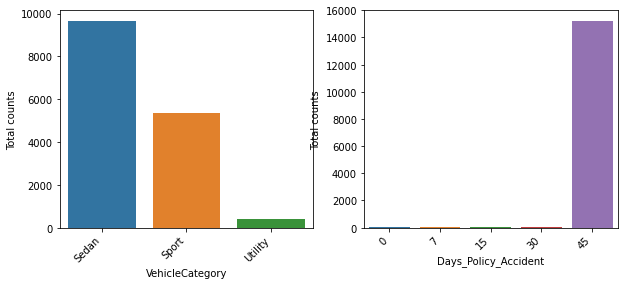

In [ ]:
VehicleCategory = fraud.groupby('VehicleCategory').agg("count").reset_index()
Days_Policy_Accident= fraud.groupby('Days_Policy_Accident').agg("count").reset_index()
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
grph1=sns.barplot(x='VehicleCategory',  y ="PolicyNumber", data = VehicleCategory , ax=ax1)
grph2= sns.barplot(x='Days_Policy_Accident', y ="PolicyNumber", data = Days_Policy_Accident, ax=ax2)
ax2.set(ylabel='Total counts')
ax1.set(ylabel='Total counts')
grph1.set_xticklabels(grph1.get_xticklabels(),
                    rotation=45,
                    horizontalalignment='right')
grph2.set_xticklabels(grph2.get_xticklabels(),
                    rotation=45,
                    horizontalalignment='right')

[Text(0, 0, 'No'), Text(0, 0, 'Yes')]

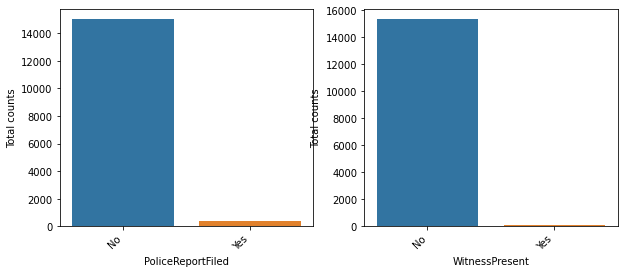

In [ ]:
PoliceReportFiled = fraud.groupby('PoliceReportFiled').agg("count").reset_index()
WitnessPresent= fraud.groupby('WitnessPresent').agg("count").reset_index()
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
grph1=sns.barplot(x='PoliceReportFiled',  y ="PolicyNumber", data = PoliceReportFiled , ax=ax1)
grph2= sns.barplot(x='WitnessPresent', y ="PolicyNumber", data = WitnessPresent, ax=ax2)
ax2.set(ylabel='Total counts')
ax1.set(ylabel='Total counts')
grph1.set_xticklabels(grph1.get_xticklabels(),
                    rotation=45,
                    horizontalalignment='right')
grph2.set_xticklabels(grph2.get_xticklabels(),
                    rotation=45,
                    horizontalalignment='right')

[Text(0, 0, '1 to 2'),
 Text(0, 0, '3 to 5'),
 Text(0, 0, 'more than 5'),
 Text(0, 0, 'none')]

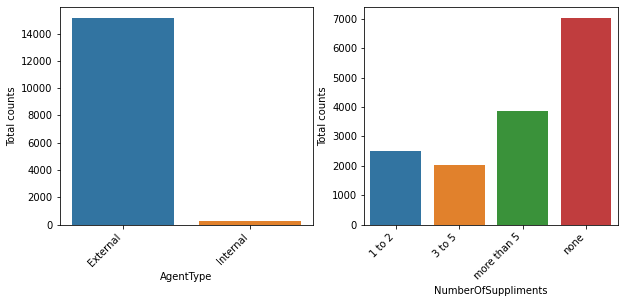

In [ ]:
AgentType = fraud.groupby('AgentType').agg("count").reset_index()
NumberOfSuppliments= fraud.groupby('NumberOfSuppliments').agg("count").reset_index()
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
grph1=sns.barplot(x='AgentType',  y ="PolicyNumber", data = AgentType , ax=ax1)
grph2= sns.barplot(x='NumberOfSuppliments', y ="PolicyNumber", data = NumberOfSuppliments, ax=ax2)
ax2.set(ylabel='Total counts')
ax1.set(ylabel='Total counts')
grph1.set_xticklabels(grph1.get_xticklabels(),
                    rotation=45,
                    horizontalalignment='right')
grph2.set_xticklabels(grph2.get_xticklabels(),
                    rotation=45,
                    horizontalalignment='right')

#Taking min. value of the range for column NumberOfSuppliments

In [ ]:
Nsupplmnt = {"none" : 0, "more than 5" : 6,"3 to 5" : 3 ,"1 to 2" : 1}
fraud["NumberOfSuppliments"] = fraud['NumberOfSuppliments'].apply(lambda x: Nsupplmnt[x])

In [ ]:
fraud["NumberOfSuppliments"].unique()

array([0, 6, 3, 1])

[Text(0, 0, '1 vehicle'),
 Text(0, 0, '2 vehicles'),
 Text(0, 0, '3 to 4'),
 Text(0, 0, '5 to 8'),
 Text(0, 0, 'more than 8')]

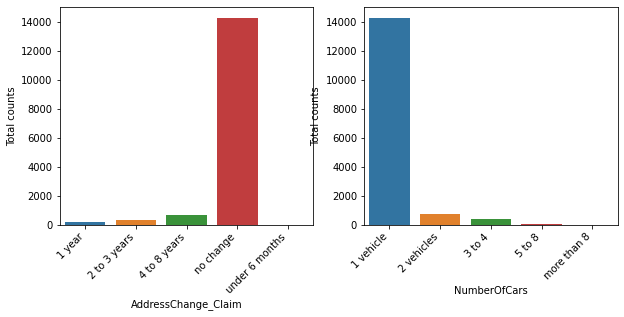

In [ ]:
AddressChange_Claim = fraud.groupby('AddressChange_Claim').agg("count").reset_index()
NumberOfCars= fraud.groupby('NumberOfCars').agg("count").reset_index()
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
grph1=sns.barplot(x='AddressChange_Claim',  y ="PolicyNumber", data = AddressChange_Claim , ax=ax1)
grph2= sns.barplot(x='NumberOfCars', y ="PolicyNumber", data = NumberOfCars, ax=ax2)
ax2.set(ylabel='Total counts')
ax1.set(ylabel='Total counts')
grph1.set_xticklabels(grph1.get_xticklabels(),
                    rotation=45,
                    horizontalalignment='right')
grph2.set_xticklabels(grph2.get_xticklabels(),
                    rotation=45,
                    horizontalalignment='right')

# Taking mean value of the ranges in columns AddressChange_Claim and min value for NumberOfCars

In [ ]:
adresschng = {"1 year" : 1, "no change" : 0 ,"4 to 8 years" : 6 ,"2 to 3 years" : 2.5, "under 6 months" :  0.5}
fraud["AddressChange_Claim"] = fraud['AddressChange_Claim'].apply(lambda x: adresschng[x])

In [ ]:
fraud["AddressChange_Claim"].unique()

array([1. , 0. , 6. , 2.5, 0.5])

In [ ]:
NCars = {"3 to 4" : 3.5, "1 vehicle" : 1 ,"2 vehicles" : 2 ,"5 to 8" : 6.5, "more than 8" :  9}
fraud["NumberOfCars"] = fraud['NumberOfCars'].apply(lambda x: NCars[x])

In [ ]:
fraud["NumberOfCars"].unique()

array([3.5, 1. , 2. , 6.5, 9. ])

[Text(0, 0, '1994'), Text(0, 0, '1995'), Text(0, 0, '1996')]

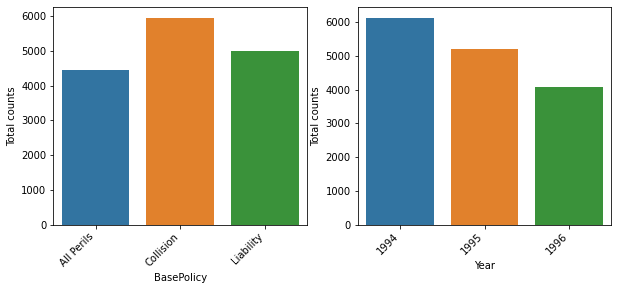

In [ ]:
BasePolicy = fraud.groupby('BasePolicy').agg("count").reset_index()
Year= fraud.groupby('Year').agg("count").reset_index()
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
grph1=sns.barplot(x='BasePolicy',  y ="PolicyNumber", data = BasePolicy , ax=ax1)
grph2= sns.barplot(x='Year', y ="PolicyNumber", data = Year, ax=ax2)
ax2.set(ylabel='Total counts')
ax1.set(ylabel='Total counts')
grph1.set_xticklabels(grph1.get_xticklabels(),
                    rotation=45,
                    horizontalalignment='right')
grph2.set_xticklabels(grph2.get_xticklabels(),
                    rotation=45,
                    horizontalalignment='right')

#Adding a column to dataset to bucket the "Make" into Luxury and Non-Luxury

In [ ]:
print('Make',fraud['Make'].unique())

Make ['Honda' 'Toyota' 'Ford' 'Mazda' 'Chevrolet' 'Pontiac' 'Accura' 'Dodge'
 'Mercury' 'Jaguar' 'Nisson' 'VW' 'Saab' 'Saturn' 'Porche' 'BMW' 'Mecedes'
 'Ferrari' 'Lexus']


In [ ]:
fraud["Grouped_Make"] = fraud["Make"]

In [ ]:
grp_make = {'Honda' : 'Non-Luxury', 'Toyota' : 'Non-Luxury', 'Ford' : 'Non-Luxury','Mazda': 'Non-Luxury',
            'Chevrolet':'Non-Luxury', 'Pontiac': 'Non-Luxury', 'Accura' :'Luxury', 'Dodge': 'Non-Luxury',
            'Mercury':'Luxury','Jaguar' :'Luxury', 'Nisson' : 'Non-Luxury','VW': 'Non-Luxury' ,'Saab' :'Luxury',
             'Saturn': 'Non-Luxury', 'Porche' :'Luxury','BMW':'Luxury', 'Mecedes' :'Luxury',
            'Ferrari':'Luxury', 'Lexus':'Luxury'}
fraud["Grouped_Make"] = fraud['Grouped_Make'].apply(lambda x: grp_make[x])

In [ ]:
fraud["Grouped_Make"].unique()

array(['Non-Luxury', 'Luxury'], dtype=object)

In [ ]:
fraud.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,Grouped_Make
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21.0,Policy Holder,Sport - Liability,Sport,79000,0,1,12,300,1,45,45,0,3,26 to 30,No,No,External,0,1.0,3.5,1994,Liability,Non-Luxury
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34.0,Policy Holder,Sport - Collision,Sport,79000,0,2,15,400,4,45,45,0,6,31 to 35,Yes,No,External,0,0.0,1.0,1994,Collision,Non-Luxury
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47.0,Policy Holder,Sport - Collision,Sport,79000,0,3,7,400,3,45,45,1,7,41 to 50,No,No,External,0,0.0,1.0,1994,Collision,Non-Luxury
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65.0,Third Party,Sedan - Liability,Sport,24500,0,4,4,400,2,45,45,1,8,51 to 65,Yes,No,External,6,0.0,1.0,1994,Liability,Non-Luxury
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27.0,Third Party,Sport - Collision,Sport,79000,0,5,3,400,1,45,45,0,5,31 to 35,No,No,External,0,0.0,1.0,1994,Collision,Non-Luxury


In [ ]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Month                 15420 non-null  object 
 1   WeekOfMonth           15420 non-null  int64  
 2   DayOfWeek             15420 non-null  object 
 3   Make                  15420 non-null  object 
 4   AccidentArea          15420 non-null  object 
 5   DayOfWeekClaimed      15420 non-null  object 
 6   MonthClaimed          15420 non-null  object 
 7   WeekOfMonthClaimed    15420 non-null  int64  
 8   Sex                   15420 non-null  object 
 9   MaritalStatus         15420 non-null  object 
 10  Age                   15420 non-null  float64
 11  Fault                 15420 non-null  object 
 12  PolicyType            15420 non-null  object 
 13  VehicleCategory       15420 non-null  object 
 14  VehiclePrice          15420 non-null  int64  
 15  FraudFound_P       

#Calculating Skewness for numeric variables only

In [ ]:
fraud.skew(axis=None, skipna=None, level=None, numeric_only=True)

WeekOfMonth              0.115426
WeekOfMonthClaimed       0.158233
Age                      0.620465
VehiclePrice             1.585149
FraudFound_P             3.711164
PolicyNumber             0.000000
RepNumber                0.006628
Deductible               6.078803
DriverRating             0.009283
Days_Policy_Accident   -10.822233
Days_Policy_Claim      -17.052852
PastNumberOfClaims       0.039177
AgeOfVehicle            -1.874884
NumberOfSuppliments      0.743913
AddressChange_Claim      4.172563
NumberOfCars             5.636080
Year                     0.245689
dtype: float64

#Describing statistics for the data

In [ ]:
fraud.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,40.198119,34701.880674,0.059857,7710.500000,8.483268,407.704280,2.487808,44.650324,44.901751,2.306291,6.605772,2.058495,0.303859,1.114818,1994.866472
std,1.287585,1.259115,12.660221,19248.743890,0.237230,4451.514911,4.599948,43.950998,1.119453,3.512465,1.471262,1.965465,1.399658,2.475815,1.228803,0.482791,0.803313
min,1.000000,1.000000,16.000000,14500.000000,0.000000,1.000000,1.000000,300.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,24500.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,45.000000,45.000000,0.000000,6.000000,0.000000,0.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,24500.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,45.000000,45.000000,1.000000,7.000000,1.000000,0.000000,1.000000,1995.000000
75%,4.000000,4.000000,48.000000,34500.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,45.000000,45.000000,4.000000,8.000000,6.000000,0.000000,1.000000,1996.000000
max,5.000000,5.000000,80.000000,79000.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,45.000000,45.000000,5.000000,8.000000,6.000000,6.000000,9.000000,1996.000000


In [ ]:
fraud.mode()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,Grouped_Make
0,Jan,3.0,Monday,Pontiac,Urban,Monday,Jan,2.0,Male,Married,30.0,Policy Holder,Sedan - Collision,Sedan,24500.0,0.0,1,7.0,400.0,1.0,45.0,45.0,4.0,7.0,31 to 35,No,No,External,0.0,0.0,1.0,1994.0,Collision,Non-Luxury
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Calculating 3 standard deviations above the mean

In [ ]:
fraud.std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



WeekOfMonth                 1.287585
WeekOfMonthClaimed          1.259115
Age                        12.660221
VehiclePrice            19248.743890
FraudFound_P                0.237230
PolicyNumber             4451.514911
RepNumber                   4.599948
Deductible                 43.950998
DriverRating                1.119453
Days_Policy_Accident        3.512465
Days_Policy_Claim           1.471262
PastNumberOfClaims          1.965465
AgeOfVehicle                1.399658
NumberOfSuppliments         2.475815
AddressChange_Claim         1.228803
NumberOfCars                0.482791
Year                        0.803313
dtype: float64

In [ ]:
Three_SD_abovemean = 3*fraud.std() + fraud.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [ ]:
Three_SD_abovemean

WeekOfMonth                 6.651342
WeekOfMonthClaimed          6.471315
Age                        78.178782
VehiclePrice            92448.112345
FraudFound_P                0.771547
PolicyNumber            21065.044732
RepNumber                  22.283113
Deductible                539.557274
DriverRating                5.846167
Days_Policy_Accident       55.187720
Days_Policy_Claim          49.315537
PastNumberOfClaims          8.202685
AgeOfVehicle               10.804746
NumberOfSuppliments         9.485941
AddressChange_Claim         3.990267
NumberOfCars                2.563190
Year                     1997.276412
dtype: float64

#Box Plot

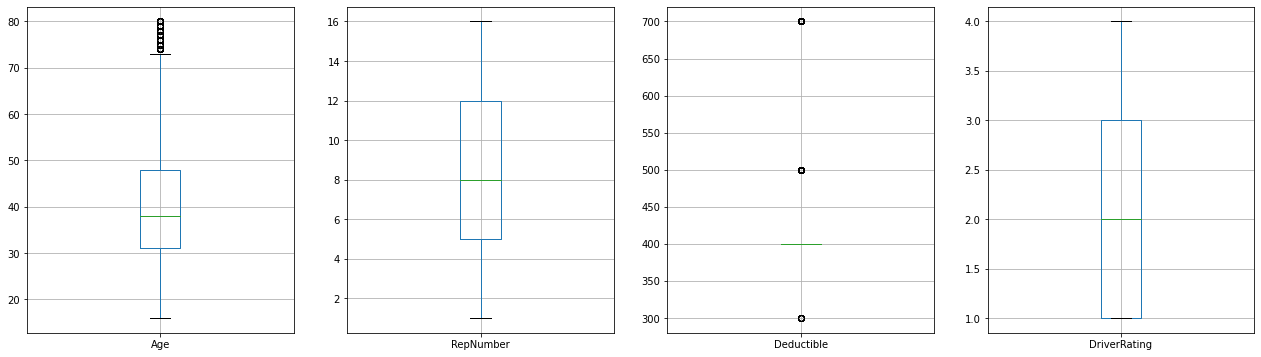

In [ ]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(22, 6))
fraud.boxplot(column=['Age'], ax=ax1)
fraud.boxplot(column=['RepNumber'], ax=ax2)
fraud.boxplot(column=['Deductible'], ax=ax3)
fraud.boxplot(column=['DriverRating'], ax=ax4)



#Converting Month and MonthClaimed to int.

In [ ]:
fraud["Month"].unique()

array(['Dec', 'Jan', 'Oct', 'Jun', 'Feb', 'Nov', 'Apr', 'Mar', 'Aug',
       'Jul', 'May', 'Sep'], dtype=object)

In [ ]:
month_number = {'Dec' : 12, 'Jan' : 1, 'Oct' : 10, 'Jun': 6, 'Feb' :2, 'Nov' : 11, 'Apr' : 4, 'Mar' : 3, 'Aug' : 8,
       'Jul': 7, 'May' : 5, 'Sep' : 9}
fraud["Month"] = fraud['Month'].apply(lambda x: month_number[x])

In [ ]:
fraud["MonthClaimed"] = fraud['MonthClaimed'].apply(lambda x: month_number[x])

In [ ]:
fraud["MonthClaimed"].unique()

array([ 1, 11,  7,  2,  3, 12,  4,  8,  5,  6,  9, 10])

In [ ]:
fraud["Month"].unique()

array([12,  1, 10,  6,  2, 11,  4,  3,  8,  7,  5,  9])

#Converting DayOfWeek and DayOfWeekClaimed to int.

In [ ]:
fraud["DayOfWeek"].unique()

array(['Wednesday', 'Friday', 'Saturday', 'Monday', 'Tuesday', 'Sunday',
       'Thursday'], dtype=object)

In [ ]:
Week_number = {'Wednesday' : 3, 'Friday' :5, 'Saturday' :6, 'Monday' :1, 'Tuesday' :2, 'Sunday' :7,
       'Thursday' : 4}
fraud["DayOfWeek"] = fraud['DayOfWeek'].apply(lambda x: Week_number[x])

In [ ]:
fraud["DayOfWeek"].unique()

array([3, 5, 6, 1, 2, 7, 4])

In [ ]:
fraud["DayOfWeekClaimed"] = fraud['DayOfWeekClaimed'].apply(lambda x: Week_number[x])

In [ ]:
fraud["DayOfWeekClaimed"].unique()

array([2, 1, 4, 5, 3])

In [ ]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Month                 15420 non-null  int64  
 1   WeekOfMonth           15420 non-null  int64  
 2   DayOfWeek             15420 non-null  int64  
 3   Make                  15420 non-null  object 
 4   AccidentArea          15420 non-null  object 
 5   DayOfWeekClaimed      15420 non-null  int64  
 6   MonthClaimed          15420 non-null  int64  
 7   WeekOfMonthClaimed    15420 non-null  int64  
 8   Sex                   15420 non-null  object 
 9   MaritalStatus         15420 non-null  object 
 10  Age                   15420 non-null  float64
 11  Fault                 15420 non-null  object 
 12  PolicyType            15420 non-null  object 
 13  VehicleCategory       15420 non-null  object 
 14  VehiclePrice          15420 non-null  int64  
 15  FraudFound_P       

In [ ]:
fraud.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
Grouped_Make            0
dtype: int64

In [ ]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Month                 15420 non-null  int64  
 1   WeekOfMonth           15420 non-null  int64  
 2   DayOfWeek             15420 non-null  int64  
 3   Make                  15420 non-null  object 
 4   AccidentArea          15420 non-null  object 
 5   DayOfWeekClaimed      15420 non-null  int64  
 6   MonthClaimed          15420 non-null  int64  
 7   WeekOfMonthClaimed    15420 non-null  int64  
 8   Sex                   15420 non-null  object 
 9   MaritalStatus         15420 non-null  object 
 10  Age                   15420 non-null  float64
 11  Fault                 15420 non-null  object 
 12  PolicyType            15420 non-null  object 
 13  VehicleCategory       15420 non-null  object 
 14  VehiclePrice          15420 non-null  int64  
 15  FraudFound_P       

In [ ]:
fraud.drop(columns = ["PolicyNumber"], inplace = True)

In [ ]:
fraud.drop(columns = ["PolicyType"], inplace = True)

In [ ]:
fraud.to_csv('fraud_cleaned.csv')

In [ ]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Month                 15420 non-null  int64  
 1   WeekOfMonth           15420 non-null  int64  
 2   DayOfWeek             15420 non-null  int64  
 3   Make                  15420 non-null  object 
 4   AccidentArea          15420 non-null  object 
 5   DayOfWeekClaimed      15420 non-null  int64  
 6   MonthClaimed          15420 non-null  int64  
 7   WeekOfMonthClaimed    15420 non-null  int64  
 8   Sex                   15420 non-null  object 
 9   MaritalStatus         15420 non-null  object 
 10  Age                   15420 non-null  float64
 11  Fault                 15420 non-null  object 
 12  VehicleCategory       15420 non-null  object 
 13  VehiclePrice          15420 non-null  int64  
 14  FraudFound_P          15420 non-null  int64  
 15  RepNumber          

In [ ]:
fraud_corr1 = fraud.corr().round(2)
fraud_corr1

,Month,WeekOfMonth,DayOfWeek,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Age,VehiclePrice,FraudFound_P,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year
Month,1.00,0.03,0.00,-0.01,0.83,0.05,-0.00,-0.04,-0.03,0.01,-0.00,0.01,0.00,0.00,-0.02,0.02,0.02,0.00,-0.02,0.05
WeekOfMonth,0.03,1.00,-0.01,0.01,0.01,0.28,-0.01,-0.00,-0.01,0.01,-0.00,-0.02,-0.03,-0.02,-0.00,-0.01,0.00,0.00,0.00,-0.00
DayOfWeek,0.00,-0.01,1.00,-0.07,-0.00,0.00,-0.00,-0.03,0.02,0.00,0.00,0.00,0.00,0.02,-0.03,-0.01,-0.00,0.01,-0.01,0.01
DayOfWeekClaimed,-0.01,0.01,-0.07,1.00,0.01,-0.01,0.00,0.01,0.01,0.01,0.01,0.00,-0.02,-0.01,0.00,0.01,-0.00,0.00,0.01,0.01
MonthClaimed,0.83,0.01,-0.00,0.01,1.00,0.06,0.01,-0.05,-0.03,0.01,-0.00,0.01,-0.00,-0.00,-0.02,0.04,0.03,0.00,-0.01,0.05
WeekOfMonthClaimed,0.05,0.28,0.00,-0.01,0.06,1.00,0.00,-0.01,-0.01,0.01,0.01,-0.00,0.01,0.01,0.02,0.00,0.01,0.01,0.01,0.01
Age,-0.00,-0.01,-0.00,0.00,0.01,0.00,1.00,-0.04,-0.03,-0.01,0.07,0.00,0.02,0.01,-0.03,0.63,0.07,-0.01,-0.00,0.02
VehiclePrice,-0.04,-0.00,-0.03,0.01,-0.05,-0.01,-0.04,1.00,0.04,0.01,-0.01,-0.00,0.00,-0.00,0.03,-0.18,0.01,-0.00,-0.01,-0.03
FraudFound_P,-0.03,-0.01,0.02,0.01,-0.03,-0.01,-0.03,0.04,1.00,-0.01,0.02,0.01,-0.02,-0.02,-0.05,-0.03,-0.03,0.01,0.01,-0.02
RepNumber,0.01,0.01,0.00,0.01,0.01,0.01,-0.01,0.01,-0.01,1.00,0.00,0.01,-0.00,0.01,-0.00,-0.01,0.01,-0.00,-0.01,0.01


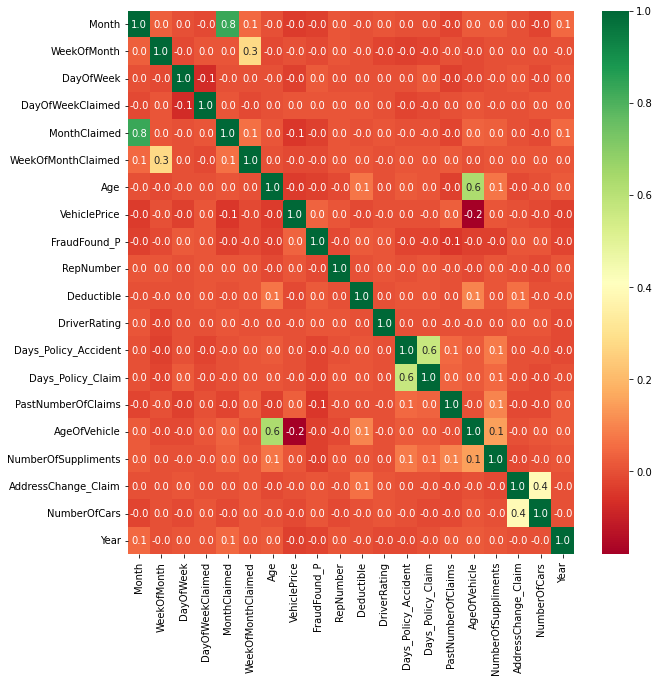

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10))   
sns.heatmap(fraud_corr1, annot= True, fmt ='.1f', cmap ='RdYlGn')

In [ ]:
from imblearn.datasets import make_imbalance
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced

In [ ]:
import imblearn
print(imblearn.__version__)

0.8.1


#Converting RepNumber to category

In [ ]:
fraud.RepNumber = fraud.RepNumber.astype("category")

In [ ]:
fraud.Month = fraud.Month.astype("category")

In [ ]:
fraud.MonthClaimed = fraud.MonthClaimed.astype("category")

In [ ]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Month                 15420 non-null  category
 1   WeekOfMonth           15420 non-null  int64   
 2   DayOfWeek             15420 non-null  int64   
 3   Make                  15420 non-null  object  
 4   AccidentArea          15420 non-null  object  
 5   DayOfWeekClaimed      15420 non-null  int64   
 6   MonthClaimed          15420 non-null  category
 7   WeekOfMonthClaimed    15420 non-null  int64   
 8   Sex                   15420 non-null  object  
 9   MaritalStatus         15420 non-null  object  
 10  Age                   15420 non-null  float64 
 11  Fault                 15420 non-null  object  
 12  VehicleCategory       15420 non-null  object  
 13  VehiclePrice          15420 non-null  int64   
 14  FraudFound_P          15420 non-null  int64   
 15  Re

#Creating Dummies and Train Test Split

In [ ]:
frauddf = pd.get_dummies(fraud, drop_first= True)
print(frauddf.shape)
frauddf.head()

(15420, 94)


,WeekOfMonth,DayOfWeek,DayOfWeekClaimed,WeekOfMonthClaimed,Age,VehiclePrice,FraudFound_P,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Make_BMW,Make_Chevrolet,Make_Dodge,Make_Ferrari,Make_Ford,Make_Honda,Make_Jaguar,Make_Lexus,Make_Mazda,Make_Mecedes,Make_Mercury,Make_Nisson,Make_Pontiac,Make_Porche,Make_Saab,Make_Saturn,Make_Toyota,Make_VW,AccidentArea_Urban,MonthClaimed_2,MonthClaimed_3,MonthClaimed_4,MonthClaimed_5,MonthClaimed_6,MonthClaimed_7,MonthClaimed_8,MonthClaimed_9,MonthClaimed_10,MonthClaimed_11,MonthClaimed_12,Sex_Male,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widow,Fault_Third Party,VehicleCategory_Sport,VehicleCategory_Utility,RepNumber_2,RepNumber_3,RepNumber_4,RepNumber_5,RepNumber_6,RepNumber_7,RepNumber_8,RepNumber_9,RepNumber_10,RepNumber_11,RepNumber_12,RepNumber_13,RepNumber_14,RepNumber_15,RepNumber_16,AgeOfPolicyHolder_18 to 20,AgeOfPolicyHolder_21 to 25,AgeOfPolicyHolder_26 to 30,AgeOfPolicyHolder_31 to 35,AgeOfPolicyHolder_36 to 40,AgeOfPolicyHolder_41 to 50,AgeOfPolicyHolder_51 to 65,AgeOfPolicyHolder_over 65,PoliceReportFiled_Yes,WitnessPresent_Yes,AgentType_Internal,BasePolicy_Collision,BasePolicy_Liability,Grouped_Make_Non-Luxury
0,5,3,2,1,21.0,79000,0,300,1,45,45,0,3,0,1.0,3.5,1994,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1
1,3,3,1,4,34.0,79000,0,400,4,45,45,0,6,0,0.0,1.0,1994,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1
2,5,5,4,2,47.0,79000,0,400,3,45,45,1,7,0,0.0,1.0,1994,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
3,2,6,5,1,65.0,24500,0,400,2,45,45,1,8,6,0.0,1.0,1994,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1
4,5,1,2,2,27.0,79000,0,400,1,45,45,0,5,0,0.0,1.0,1994,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1


In [ ]:
X_up = frauddf.drop(columns = ['FraudFound_P'])
y_up = frauddf['FraudFound_P']

#Up sampling the data

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_up, y_up)

df_smote_over = pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res)], axis = 1)



In [ ]:
y_res.value_counts()

0    14497
1    14497
Name: FraudFound_P, dtype: int64

In [ ]:
#Rep number to category, month and day of week as category, Year as category, 

In [ ]:
df_smote_over

,WeekOfMonth,DayOfWeek,DayOfWeekClaimed,WeekOfMonthClaimed,Age,VehiclePrice,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Make_BMW,Make_Chevrolet,Make_Dodge,Make_Ferrari,Make_Ford,Make_Honda,Make_Jaguar,Make_Lexus,Make_Mazda,Make_Mecedes,Make_Mercury,Make_Nisson,Make_Pontiac,Make_Porche,Make_Saab,Make_Saturn,Make_Toyota,Make_VW,AccidentArea_Urban,MonthClaimed_2,MonthClaimed_3,MonthClaimed_4,MonthClaimed_5,MonthClaimed_6,MonthClaimed_7,MonthClaimed_8,MonthClaimed_9,MonthClaimed_10,MonthClaimed_11,MonthClaimed_12,Sex_Male,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widow,Fault_Third Party,VehicleCategory_Sport,VehicleCategory_Utility,RepNumber_2,RepNumber_3,RepNumber_4,RepNumber_5,RepNumber_6,RepNumber_7,RepNumber_8,RepNumber_9,RepNumber_10,RepNumber_11,RepNumber_12,RepNumber_13,RepNumber_14,RepNumber_15,RepNumber_16,AgeOfPolicyHolder_18 to 20,AgeOfPolicyHolder_21 to 25,AgeOfPolicyHolder_26 to 30,AgeOfPolicyHolder_31 to 35,AgeOfPolicyHolder_36 to 40,AgeOfPolicyHolder_41 to 50,AgeOfPolicyHolder_51 to 65,AgeOfPolicyHolder_over 65,PoliceReportFiled_Yes,WitnessPresent_Yes,AgentType_Internal,BasePolicy_Collision,BasePolicy_Liability,Grouped_Make_Non-Luxury,FraudFound_P
0,5,3,2,1,21.000000,79000,300,1,45,45,0,3,0,1.000000,3.500000,1994,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
1,3,3,1,4,34.000000,79000,400,4,45,45,0,6,0,0.000000,1.000000,1994,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0
2,5,5,4,2,47.000000,79000,400,3,45,45,1,7,0,0.000000,1.000000,1994,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
3,2,6,5,1,65.000000,24500,400,2,45,45,1,8,6,0.000000,1.000000,1994,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0
4,5,1,2,2,27.000000,79000,400,1,45,45,0,5,0,0.000000,1.000000,1994,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28989,1,3,1,2,32.218118,24500,400,3,45,45,5,5,0,0.000000,1.000000,1994,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1
28990,3,1,3,4,57.214164,24500,400,2,45,45,0,6,0,0.000000,1.000000,1995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
28991,3,5,4,1,64.219450,24500,400,3,45,45,1,8,5,0.260183,2.849542,1994,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
28992,3,2,4,1,46.545640,79000,400,3,45,45,0,8,0,0.000000,1.000000,1995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1


In [ ]:
df_smote_over.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28994 entries, 0 to 28993
Data columns (total 94 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   WeekOfMonth                 28994 non-null  int64  
 1   DayOfWeek                   28994 non-null  int64  
 2   DayOfWeekClaimed            28994 non-null  int64  
 3   WeekOfMonthClaimed          28994 non-null  int64  
 4   Age                         28994 non-null  float64
 5   VehiclePrice                28994 non-null  int64  
 6   Deductible                  28994 non-null  int64  
 7   DriverRating                28994 non-null  int64  
 8   Days_Policy_Accident        28994 non-null  int64  
 9   Days_Policy_Claim           28994 non-null  int64  
 10  PastNumberOfClaims          28994 non-null  int64  
 11  AgeOfVehicle                28994 non-null  int64  
 12  NumberOfSuppliments         28994 non-null  int64  
 13  AddressChange_Claim         289

In [ ]:
df_smote_over["AddressChange_Claim"].unique()

array([1.00000000e+00, 0.00000000e+00, 6.00000000e+00, 2.50000000e+00,
       5.00000000e-01, 1.91539711e-01, 2.18832271e+00, 5.80913898e-01,
       2.60288409e+00, 1.37059684e-01, 6.16479359e-01, 2.41068051e-01,
       1.09782212e-02, 9.23380186e-01, 6.00007104e-01, 2.10901441e+00,
       1.36598834e-02, 6.23180394e-01, 3.35624589e-01, 1.41553899e+00,
       2.69822686e+00, 8.29353944e-02, 1.89371130e+00, 3.14546098e-01,
       4.11042565e-01, 3.70250156e+00, 2.31311395e+00, 8.30484112e-03,
       4.79415580e+00, 8.61982795e-02, 5.36654615e+00, 8.11653127e-01,
       1.24062193e+00, 8.12033293e-01, 2.52679628e-01, 2.84800374e-01,
       2.44290078e-01, 2.70661740e-01, 4.14963245e+00, 1.76698404e+00,
       5.19456949e+00, 8.13192102e-01, 7.98553518e-01, 1.36042972e-01,
       2.07155466e-01, 9.87342172e-01, 4.42338752e-01, 3.67707013e-01,
       4.55806272e+00, 3.20977430e-02, 7.03027413e-01, 2.08981018e+00,
       5.69002695e+00, 1.53739592e+00, 1.77970521e+00, 2.11690388e-01,
      

In [ ]:
df_smote_over["DayOfWeekClaimed"].unique()

array([2, 1, 4, 5, 3])

In [ ]:
df_smote_over["DayOfWeek"].unique()

array([3, 5, 6, 1, 2, 7, 4])

In [ ]:
df_smote_over["WeekOfMonth"].unique()

array([5, 3, 2, 4, 1])

In [ ]:
df_smote_over["Days_Policy_Accident"].unique()

array([45, 30,  0,  7, 15, 29, 18,  3,  2,  4, 41,  5,  9, 19,  1, 32, 36,
       38, 21, 31, 20, 13,  6, 24, 42, 28, 43, 34, 23, 37, 16, 40, 12, 10,
       39,  8, 33, 11, 25, 27, 17, 35, 26, 44, 22])

In [ ]:
df_smote_over["Days_Policy_Claim"].unique()

array([45, 30, 15,  0, 31, 36, 33, 22, 34, 24, 44, 20, 38, 32, 17, 37, 39,
       40, 42, 35, 41, 23, 19, 25, 43, 28, 29, 26, 18, 27])

In [ ]:
df_smote_over["PastNumberOfClaims"].unique()

array([0, 1, 4, 5, 2, 3])

In [ ]:
df_smote_over["DriverRating"].unique()

array([1, 4, 3, 2])

In [ ]:
X = df_smote_over.drop(columns = ['FraudFound_P'])
y = df_smote_over['FraudFound_P']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.4, random_state = 1)

#Decision trees

In [ ]:
frauddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 94 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   WeekOfMonth                 15420 non-null  int64  
 1   DayOfWeek                   15420 non-null  int64  
 2   DayOfWeekClaimed            15420 non-null  int64  
 3   WeekOfMonthClaimed          15420 non-null  int64  
 4   Age                         15420 non-null  float64
 5   VehiclePrice                15420 non-null  int64  
 6   FraudFound_P                15420 non-null  int64  
 7   Deductible                  15420 non-null  int64  
 8   DriverRating                15420 non-null  int64  
 9   Days_Policy_Accident        15420 non-null  int64  
 10  Days_Policy_Claim           15420 non-null  int64  
 11  PastNumberOfClaims          15420 non-null  int64  
 12  AgeOfVehicle                15420 non-null  int64  
 13  NumberOfSuppliments         154

In [ ]:
from sklearn import metrics

In [ ]:
classtreefull = DecisionTreeClassifier(random_state=1)
fulltree = classtreefull.fit(X_train,y_train)

In [ ]:
y_pred_gini = fulltree.predict(X_valid)

In [ ]:
print('Gini stats')
print("Accuracy:",metrics.accuracy_score(y_valid, y_pred_gini))
print("balanced_accuracy:",metrics.balanced_accuracy_score(y_valid, y_pred_gini))
print("brier_score_loss:",metrics.brier_score_loss(y_valid, y_pred_gini))
print("f1_score:",metrics.f1_score(y_valid,y_pred_gini))
print("recall_score:",metrics.recall_score(y_valid, y_pred_gini))
print("precision_score:",metrics.precision_score(y_valid, y_pred_gini))
print("roc_auc_score:",metrics.roc_auc_score(y_valid, y_pred_gini))

Gini stats
Accuracy: 0.934730125883773
balanced_accuracy: 0.935113883896584
brier_score_loss: 0.06526987411622694
f1_score: 0.9349376880103137
recall_score: 0.955719557195572
precision_score: 0.9150403768506057
roc_auc_score: 0.9351138838965842


In [ ]:
classificationSummary(y_train,classtreefull.predict(X_train))

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1
     0 8590    0
     1    0 8806


In [ ]:
classificationSummary(y_valid,classtreefull.predict(X_valid))

Confusion Matrix (Accuracy 0.9347)

       Prediction
Actual    0    1
     0 5402  505
     1  252 5439


In [ ]:
classtree = DecisionTreeClassifier(random_state=1, max_depth=5)
tree = classtree.fit(X_train,y_train)

In [ ]:
y_pred_gini_tree = tree.predict(X_valid)

In [ ]:
print('Gini stats')
print("Accuracy:",metrics.accuracy_score(y_valid, y_pred_gini_tree))
print("balanced_accuracy:",metrics.balanced_accuracy_score(y_valid, y_pred_gini_tree))
print("brier_score_loss:",metrics.brier_score_loss(y_valid, y_pred_gini_tree))
print("f1_score:",metrics.f1_score(y_valid,y_pred_gini_tree))
print("recall_score:",metrics.recall_score(y_valid, y_pred_gini_tree))
print("precision_score:",metrics.precision_score(y_valid, y_pred_gini_tree))
print("roc_auc_score:",metrics.roc_auc_score(y_valid, y_pred_gini_tree))

Gini stats
Accuracy: 0.834971546818417
balanced_accuracy: 0.8369864689722861
brier_score_loss: 0.16502845318158302
f1_score: 0.8489583333333334
recall_score: 0.9451765946230891
precision_score: 0.7705199828104856
roc_auc_score: 0.836986468972286


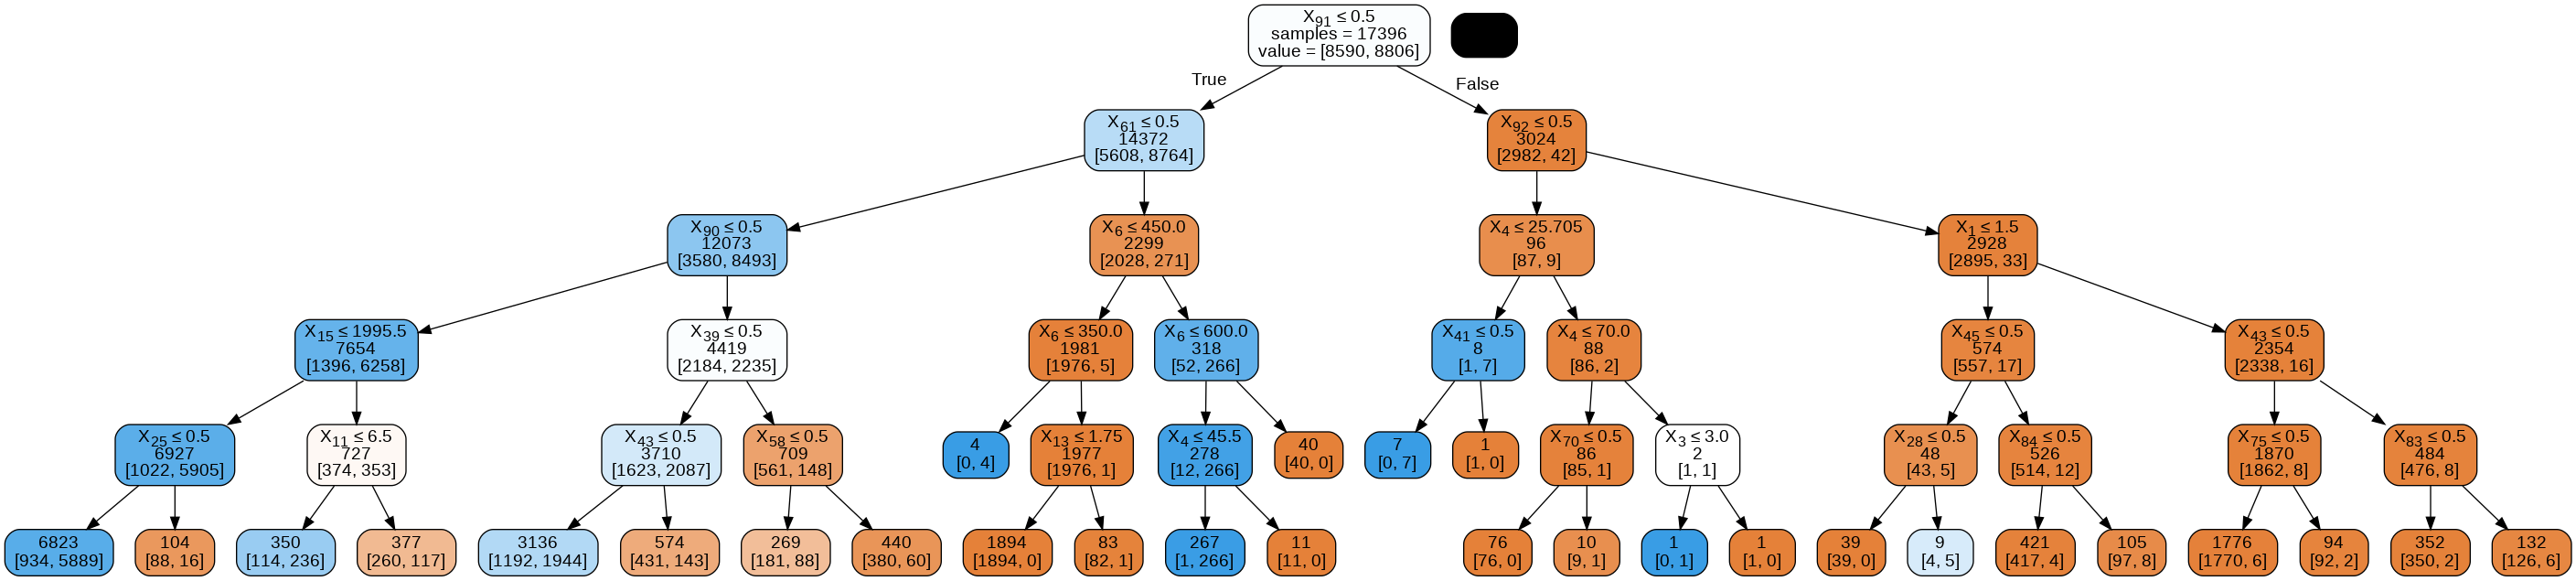

In [ ]:
plotDecisionTree(classtree)

In [ ]:
classificationSummary(y_train,classtree.predict(X_train))

Confusion Matrix (Accuracy 0.8448)

       Prediction
Actual    0    1
     0 6345 2245
     1  454 8352


In [ ]:
classificationSummary(y_valid,classtree.predict(X_valid))

Confusion Matrix (Accuracy 0.8350)

       Prediction
Actual    0    1
     0 4305 1602
     1  312 5379


#Regression Model

**Linear Regression or Full Regression** 

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
linearreg = model.fit(X_train,y_train)

In [ ]:
linearreg.intercept_

37.51473132633406

In [ ]:
linearreg.coef_

array([-7.30167789e-03, -3.55189525e-04, -4.30485991e-03, -3.08546670e-03,
        4.62828528e-04,  2.13025761e-07,  1.47078485e-04, -6.05658192e-03,
       -1.18065217e-03,  2.55023831e-03, -1.83432033e-03, -1.38766588e-02,
       -2.75547227e-03,  1.73764045e-03,  3.81477390e-04, -1.82303056e-02,
       -1.02563073e-01, -1.15298621e-01, -1.69550709e-01, -1.23867148e-01,
       -1.44800748e-01, -1.55997765e-01, -1.55569264e-01, -1.63043613e-01,
       -1.71470135e-01, -1.93144194e-01, -2.29459824e-01, -1.58522734e-01,
       -2.07027891e-01, -2.47397262e-01, -5.52162333e-01, -1.98253650e-01,
       -1.92048578e-01, -2.69163510e-01, -3.35153067e-01, -2.11437977e-01,
        2.10951991e-02, -2.44775804e-01, -3.23398557e-01, -1.93180540e-01,
       -1.47257735e-01, -1.75467899e-01, -2.21560969e-01, -1.90709910e-01,
       -2.56014521e-01, -2.81926250e-02, -2.05489308e-01, -1.69735775e-01,
       -1.28128507e-01, -1.36592603e-01, -1.51368555e-01, -1.59617807e-01,
       -1.21381928e-01, -

In [ ]:
train_pred = model.predict(X_train)
train_pred

array([0.59642586, 0.03832474, 0.03503547, ..., 0.18821554, 0.19217753,
       0.26037946])

In [ ]:
regressionSummary(train_pred, y_train)


Regression statistics

               Mean Error (ME) : 0.0000
Root Mean Squared Error (RMSE) : 0.2219
     Mean Absolute Error (MAE) : 0.1454


In [ ]:
train_valid = model.predict(X_valid)
train_valid

array([0.55929558, 0.9780646 , 0.07607488, ..., 0.71728106, 0.00166895,
       0.1598526 ])

In [ ]:
regressionSummary(train_valid, y_valid)


Regression statistics

                      Mean Error (ME) : 0.0049
       Root Mean Squared Error (RMSE) : 0.2203
            Mean Absolute Error (MAE) : 0.1455
          Mean Percentage Error (MPE) : 25.1946
Mean Absolute Percentage Error (MAPE) : 87.3780


**Forward Regression**

In [ ]:
from dmba import regressionSummary, classificationSummary, liftChart, gainsChart, adjusted_r2_score, exhaustive_search, backward_elimination, forward_selection, AIC_score, BIC_score


In [ ]:
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(X_train[variables], y_train)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(y_train, [y_train.mean()] * len(y_train), model, df=1)
    return AIC_score(y_train, model.predict(X_train[variables]), model)

Forward_model, Forward_variables = forward_selection(X_train.columns, train_model, score_model, verbose=True)

print(Forward_variables)

Variables: WeekOfMonth, DayOfWeek, DayOfWeekClaimed, WeekOfMonthClaimed, Age, VehiclePrice, Deductible, DriverRating, Days_Policy_Accident, Days_Policy_Claim, PastNumberOfClaims, AgeOfVehicle, NumberOfSuppliments, AddressChange_Claim, NumberOfCars, Year, Month_2, Month_3, Month_4, Month_5, Month_6, Month_7, Month_8, Month_9, Month_10, Month_11, Month_12, Make_BMW, Make_Chevrolet, Make_Dodge, Make_Ferrari, Make_Ford, Make_Honda, Make_Jaguar, Make_Lexus, Make_Mazda, Make_Mecedes, Make_Mercury, Make_Nisson, Make_Pontiac, Make_Porche, Make_Saab, Make_Saturn, Make_Toyota, Make_VW, AccidentArea_Urban, MonthClaimed_2, MonthClaimed_3, MonthClaimed_4, MonthClaimed_5, MonthClaimed_6, MonthClaimed_7, MonthClaimed_8, MonthClaimed_9, MonthClaimed_10, MonthClaimed_11, MonthClaimed_12, Sex_Male, MaritalStatus_Married, MaritalStatus_Single, MaritalStatus_Widow, Fault_Third Party, VehicleCategory_Sport, VehicleCategory_Utility, RepNumber_2, RepNumber_3, RepNumber_4, RepNumber_5, RepNumber_6, RepNumber_

In [ ]:
regressionSummary(y_valid, Forward_model.predict(X_valid[Forward_variables]))


Regression statistics

               Mean Error (ME) : -0.0048
Root Mean Squared Error (RMSE) : 0.2203
     Mean Absolute Error (MAE) : 0.1453


**Backward Regression**

In [ ]:
def train_model1(variables1):
    model1 = LinearRegression()
    model1.fit(X_train[variables1], y_train)
    return model1

def score_model1(model1, variables1):
    return AIC_score(y_train, model1.predict(X_train[variables1]), model1)

backward_model, backward_variables = backward_elimination(X_train.columns, train_model1, score_model1, verbose=True)

print(backward_variables)

Variables: WeekOfMonth, DayOfWeek, DayOfWeekClaimed, WeekOfMonthClaimed, Age, VehiclePrice, Deductible, DriverRating, Days_Policy_Accident, Days_Policy_Claim, PastNumberOfClaims, AgeOfVehicle, NumberOfSuppliments, AddressChange_Claim, NumberOfCars, Year, Month_2, Month_3, Month_4, Month_5, Month_6, Month_7, Month_8, Month_9, Month_10, Month_11, Month_12, Make_BMW, Make_Chevrolet, Make_Dodge, Make_Ferrari, Make_Ford, Make_Honda, Make_Jaguar, Make_Lexus, Make_Mazda, Make_Mecedes, Make_Mercury, Make_Nisson, Make_Pontiac, Make_Porche, Make_Saab, Make_Saturn, Make_Toyota, Make_VW, AccidentArea_Urban, MonthClaimed_2, MonthClaimed_3, MonthClaimed_4, MonthClaimed_5, MonthClaimed_6, MonthClaimed_7, MonthClaimed_8, MonthClaimed_9, MonthClaimed_10, MonthClaimed_11, MonthClaimed_12, Sex_Male, MaritalStatus_Married, MaritalStatus_Single, MaritalStatus_Widow, Fault_Third Party, VehicleCategory_Sport, VehicleCategory_Utility, RepNumber_2, RepNumber_3, RepNumber_4, RepNumber_5, RepNumber_6, RepNumber_

In [ ]:
regressionSummary(y_train, backward_model.predict(X_train[backward_variables]))


Regression statistics

               Mean Error (ME) : -0.0000
Root Mean Squared Error (RMSE) : 0.2219
     Mean Absolute Error (MAE) : 0.1454


In [ ]:
regressionSummary(y_valid, backward_model.predict(X_valid[backward_variables]))


Regression statistics

               Mean Error (ME) : -0.0049
Root Mean Squared Error (RMSE) : 0.2203
     Mean Absolute Error (MAE) : 0.1454


StepWise regression

**Logistic Regresssion**

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [ ]:
logit_reg = LogisticRegression(solver='liblinear', C=1e42, random_state=1)
logit_reg.fit(X_train, y_train)

LogisticRegression(C=1e+42, random_state=1, solver='liblinear')

In [ ]:
logit_reg.intercept_

array([0.00248065])

In [ ]:
logit_reg.coef_

array([[-1.41930271e-01, -6.27834682e-02, -8.81882147e-02,
        -1.15925245e-01, -7.89142721e-03,  1.18753317e-06,
         3.92906791e-03, -1.57342898e-01,  3.20306435e-03,
        -6.22286722e-02, -1.05005125e-01, -1.65983778e-01,
        -5.37614643e-02,  4.27089224e-02,  2.32132935e-03,
         4.73008485e-03, -8.42736286e-01, -8.07824378e-01,
        -9.33549604e-01, -7.25447778e-01, -8.89469592e-01,
        -9.32026974e-01, -7.52704772e-01, -8.60352241e-01,
        -9.32816616e-01, -9.48560040e-01, -1.07221259e+00,
        -3.28389531e-02, -1.24227191e+00, -1.37050472e-01,
        -6.88873166e-03, -4.60251401e-01, -1.07988997e+00,
        -2.17982896e-02, -4.85372824e-03, -1.30408741e+00,
        -7.21628771e-03, -1.98189764e-01, -5.09954278e-02,
        -1.47964358e+00, -8.65269580e-03, -1.93224603e-01,
        -9.31321791e-02, -1.40836185e+00, -3.87695712e-01,
        -5.46522766e-01, -9.28086211e-01, -9.14135983e-01,
        -8.05429641e-01, -8.20472153e-01, -8.50975752e-0

In [ ]:
print(pd.DataFrame({'coef': logit_reg.coef_[0]}, index=X.columns))

                             coef
WeekOfMonth             -0.141930
DayOfWeek               -0.062783
DayOfWeekClaimed        -0.088188
WeekOfMonthClaimed      -0.115925
Age                     -0.007891
...                           ...
WitnessPresent_Yes      -0.071272
AgentType_Internal      -0.158060
BasePolicy_Collision    -0.704640
BasePolicy_Liability    -1.944267
Grouped_Make_Non-Luxury -0.205220

[93 rows x 1 columns]


In [ ]:
logit_reg_prob = logit_reg.predict_proba(X_valid)

In [ ]:
logit_reg_pred = logit_reg.predict(X_valid)

In [ ]:
logit_result = pd.DataFrame({'actual' : y_valid,
                             'p_0' : [p[0] for p in logit_reg_prob],
                             'p_1' : [p[1] for p in logit_reg_prob],
                             'predicted': logit_reg_pred})
logit_result

,actual,p_0,p_1,predicted
14810,0,0.637137,0.362863,0
26866,1,0.035150,0.964850,1
3713,0,0.875142,0.124858,0
24587,1,0.041625,0.958375,1
12719,0,0.844120,0.155880,0
...,...,...,...,...
19197,1,0.029595,0.970405,1
12024,1,0.838331,0.161669,0
21830,1,0.138608,0.861392,1
3597,0,0.987706,0.012294,0


In [ ]:
classificationSummary(y_train, logit_reg.predict(X_train))

Confusion Matrix (Accuracy 0.9387)

       Prediction
Actual    0    1
     0 8113  477
     1  589 8217


In [ ]:
classificationSummary(y_valid, logit_reg.predict(X_valid))

Confusion Matrix (Accuracy 0.9387)

       Prediction
Actual    0    1
     0 5568  339
     1  372 5319


**Gains Chart**

In [ ]:
!pip install dmba
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
Gains = logit_result.sort_values(by=['p_1'], ascending=False)
Gains

,actual,p_0,p_1,predicted
20417,1,0.001459,0.998541,1
26780,1,0.001463,0.998537,1
15941,1,0.001935,0.998065,1
16983,1,0.002177,0.997823,1
16644,1,0.002482,0.997518,1
...,...,...,...,...
1160,0,0.999433,0.000567,0
15112,0,0.999460,0.000540,0
9974,0,0.999499,0.000501,0
13502,0,0.999510,0.000490,0


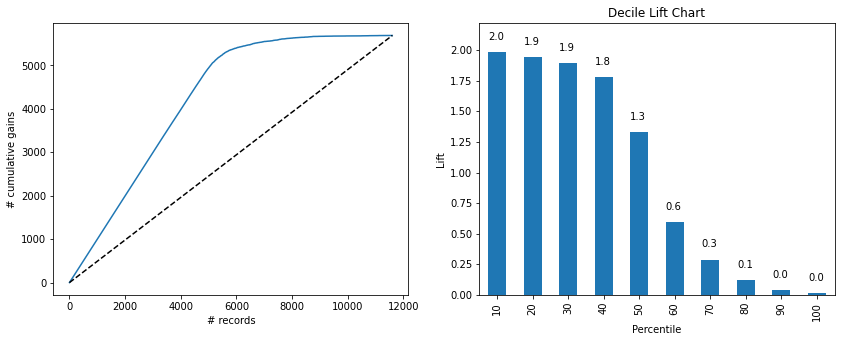

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(14,5))
gainsChart(Gains.actual,ax=axes[0])
liftChart(Gains['p_1'],ax=axes[1])

**GridSearch Regression Tree and Randomforest**

In [ ]:
param_grid = {
    'max_depth' : [2,3,5,10],
    'min_samples_split' :[0.07,0.05,0.01,0.005],
    'min_impurity_decrease' : [0.05, 0.02, 0.01, 0.001]
}

In [ ]:
gridsearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5, n_jobs= -1)
gridsearch.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_impurity_decrease': [0.05, 0.02, 0.01, 0.001],
                         'min_samples_split': [0.07, 0.05, 0.01, 0.005]})

In [ ]:
gridsearch.best_params_

{'max_depth': 10, 'min_impurity_decrease': 0.001, 'min_samples_split': 0.005}

In [ ]:
gridsearch.best_score_

0.8964130761580981

In [ ]:
gridsearch.best_estimator_

DecisionTreeClassifier(max_depth=10, min_impurity_decrease=0.001,
                       min_samples_split=0.005, random_state=1)

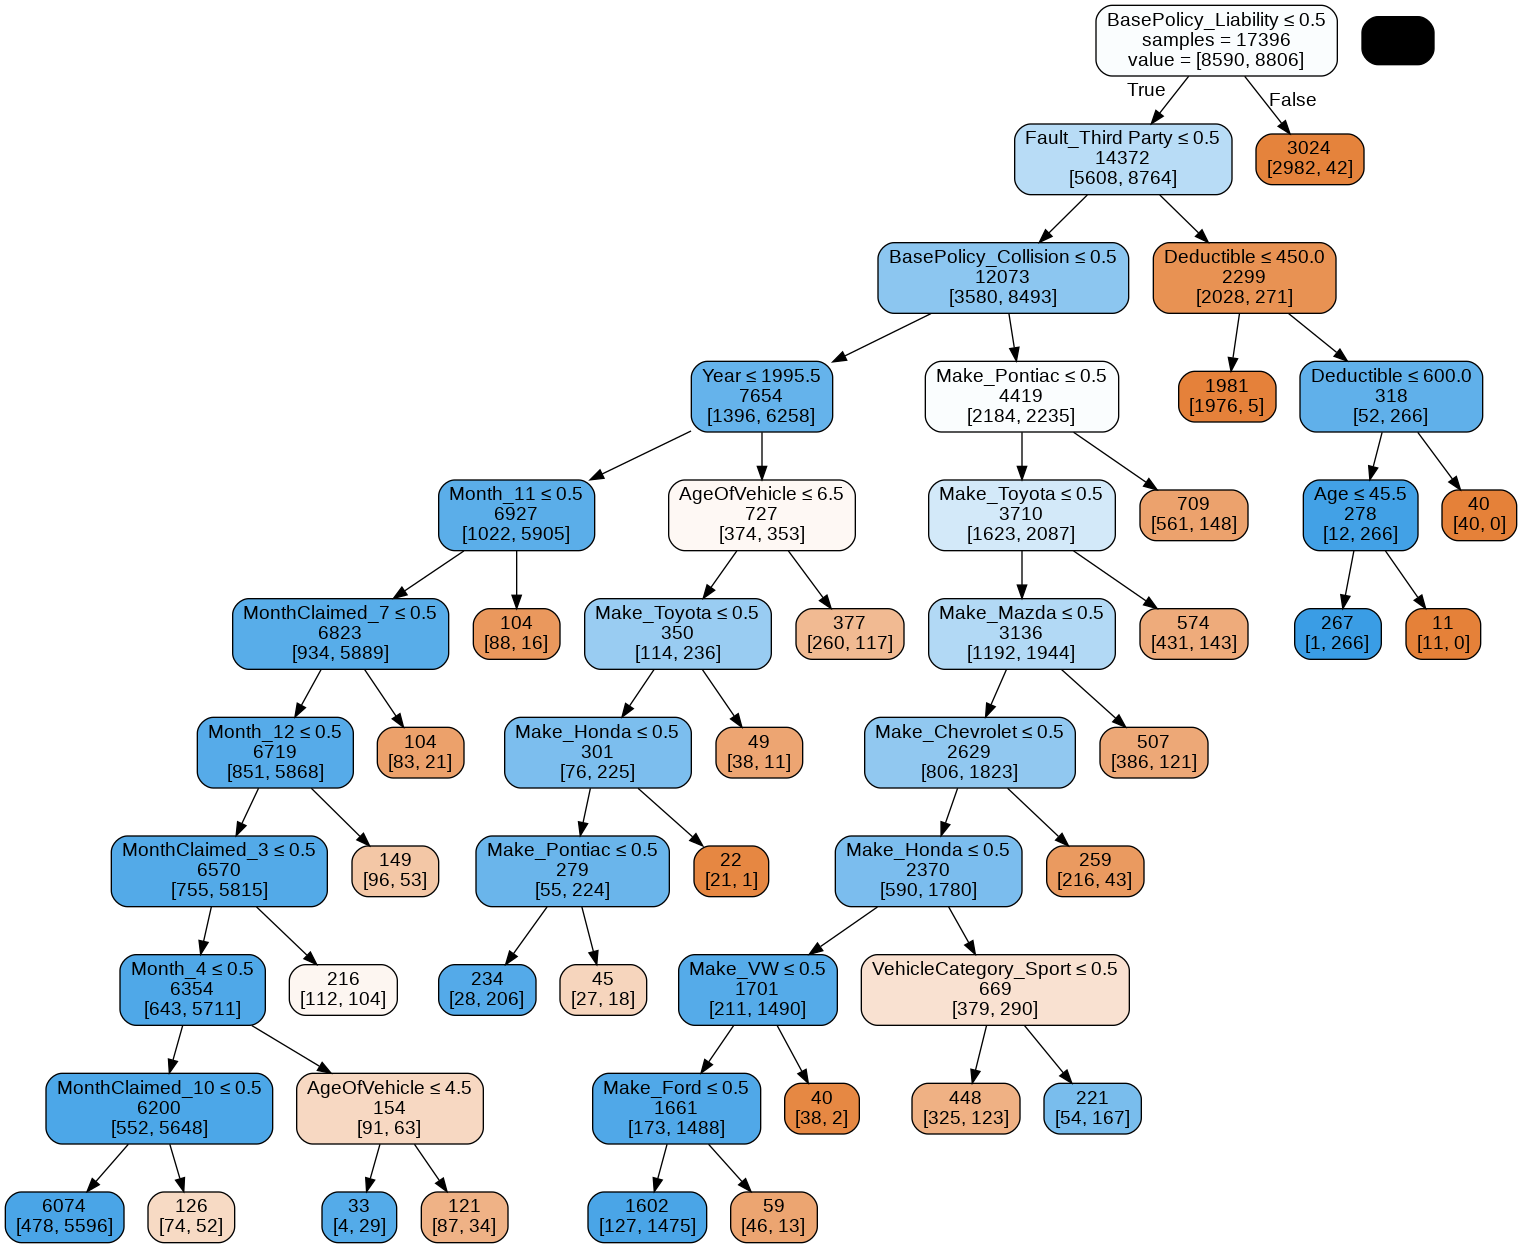

In [ ]:
gridsearchtree = gridsearch.best_estimator_
plotDecisionTree(gridsearchtree, feature_names = X_train.columns)

In [ ]:
regressionSummary(y_train, gridsearchtree.predict(X_train))


Regression statistics

               Mean Error (ME) : 0.0216
Root Mean Squared Error (RMSE) : 0.3180
     Mean Absolute Error (MAE) : 0.1011


In [ ]:
cross_val_score(gridsearchtree, X_train, y_train, cv=8)

array([0.89241379, 0.89609195, 0.89931034, 0.89471264, 0.89972401,
       0.89374425, 0.89466421, 0.89420423])

In [ ]:
classificationSummary(y_valid, gridsearchtree.predict(X_valid))

Confusion Matrix (Accuracy 0.8957)

       Prediction
Actual    0    1
     0 5414  493
     1  717 4974


In [ ]:
random_forest = RandomForestClassifier(random_state=1, n_estimators=500)
random_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=1)

In [ ]:
importance = random_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_forest.estimators_], axis= 0)

In [ ]:
random_forest_df = pd.DataFrame({"feature" : X_train.columns,
                                 "importance" : importance,
                                 "Std" : std})
print(random_forest_df.sort_values("importance", ascending = False))

                  feature  importance       Std
91   BasePolicy_Liability    0.089919  0.075770
61      Fault_Third Party    0.082640  0.035666
62  VehicleCategory_Sport    0.070720  0.070997
39           Make_Pontiac    0.033494  0.020399
15                   Year    0.033143  0.019033
..                    ...         ...       ...
33            Make_Jaguar    0.000050  0.000140
36           Make_Mecedes    0.000026  0.000082
40            Make_Porche    0.000012  0.000059
34             Make_Lexus    0.000009  0.000052
30           Make_Ferrari    0.000008  0.000055

[93 rows x 3 columns]


In [ ]:
classificationSummary(y_valid, random_forest.predict(X_valid))

Confusion Matrix (Accuracy 0.9668)

       Prediction
Actual    0    1
     0 5831   76
     1  309 5382


#Neural Networks

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier, MLPRegressor

**Two Hidden layers**

In [ ]:
clf=MLPClassifier(hidden_layer_sizes=2, activation='logistic',solver='lbfgs',random_state=1)
clf.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=2, random_state=1,
              solver='lbfgs')

In [ ]:
classificationSummary(y_train, clf.predict(X_train))

Confusion Matrix (Accuracy 0.5062)

       Prediction
Actual    0    1
     0    0 8590
     1    0 8806


In [ ]:
classificationSummary(y_valid, clf.predict(X_valid))

Confusion Matrix (Accuracy 0.4907)

       Prediction
Actual    0    1
     0    0 5907
     1    0 5691


In [ ]:
clf.predict_proba(X_train)

array([[0.49381197, 0.50618803],
       [0.49381197, 0.50618803],
       [0.49381197, 0.50618803],
       ...,
       [0.49381197, 0.50618803],
       [0.49381197, 0.50618803],
       [0.49381197, 0.50618803]])

**10 hidden layers**

In [ ]:
clf1 = MLPClassifier(hidden_layer_sizes=10,activation='logistic',solver='lbfgs',random_state=1,
                    max_iter=1000)
clf1.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=10, max_iter=1000,
              random_state=1, solver='lbfgs')

In [ ]:
classificationSummary(y_train,(clf1.predict_proba(X_train)[:,1] >= 0.05).astype(bool))

Confusion Matrix (Accuracy 0.5062)

       Prediction
Actual    0    1
     0    0 8590
     1    0 8806


In [ ]:
classificationSummary(y_valid, clf1.predict(X_valid))

Confusion Matrix (Accuracy 0.4907)

       Prediction
Actual    0    1
     0    0 5907
     1    0 5691
